In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Creating world

In [2]:
def create_world(width, higth):
    return np.zeros((higth, width))

def init_world(world, thresh):
    for index_y, value_y in enumerate(world):
        for index_x, value_x in enumerate(value_y):
            if index_x == 0 or index_x == world.shape[0] -1:
                world[index_y][index_x] = 1
            elif np.random.rand() < thresh:
                    world[index_y][index_x] = 1
    
    world[0] = 1
    world[-1] = 1
    return world           

def calculate_surrounding_pos(world):
    calculate_array = np.zeros(world.shape)
    for index_y, value_y in enumerate(calculate_array[1:-1]):
        for index_x, value_x in enumerate(value_y[1:-1]):
            array_index_x = index_x + 1
            array_index_y = index_y + 1
            count = world[array_index_y - 1][array_index_x - 1] + world[array_index_y - 1][array_index_x] + world[array_index_y - 1][array_index_x + 1] + \
                    world[array_index_y][array_index_x - 1]     + world[array_index_y][array_index_x]     + world[array_index_y][array_index_x + 1] + \
                    world[array_index_y + 1][array_index_x - 1] + world[array_index_y + 1][array_index_x] + world[array_index_y + 1][array_index_x + 1]
            
            calculate_array[array_index_y][array_index_x] = count
            
#             if index_x == 0 or index_x == world.shape[0] -1:
#                 world[index_y][index_x] = 1
                
#     calculate_array[0] = 1
#     calculate_array[-1] = 1
    return calculate_array

def update_world(world, step, birth_thresh, survival_thresh):
    for _ in range(step):
        calculate_alive = calculate_surrounding_pos(world)
        for index_y, value_y in enumerate(np.zeros(world.shape)[1:-1]):
            for index_x, value_x in enumerate(value_y[1:-1]):
                array_index_x = index_x + 1
                array_index_y = index_y + 1
                
                # Survival check
                if world[array_index_y][array_index_x] == 1:
                    if calculate_alive[array_index_y][array_index_x] < survival_thresh:
                        world[array_index_y][array_index_x] = 0
                    continue
                        
                # Birth check
                if world[array_index_y][array_index_x] == 0:
                    if calculate_alive[array_index_y][array_index_x] > birth_thresh:
                        world[array_index_y][array_index_x] = 1
                    continue
                        
    return world,calculate_alive

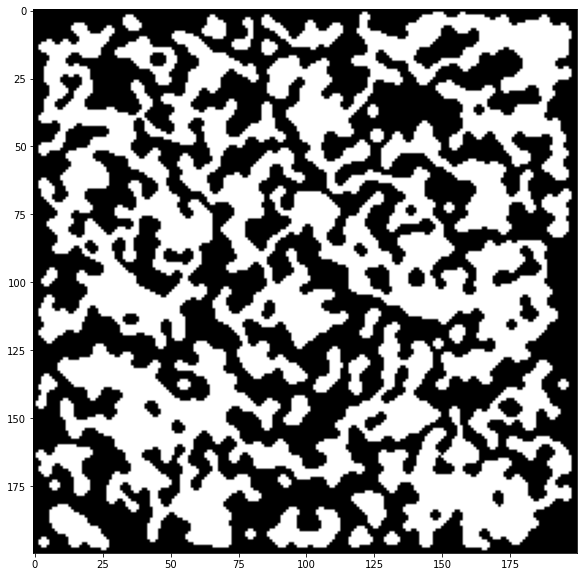

In [3]:
thresh = 0.5
world = create_world(200,200)
world = init_world(world,thresh)
# calculate_value = calculate_surrounding_pos(world)

# world = update_world(world, calculate_value, step = 30, birth_thresh= 5, survival_thresh =4)
# calculate_value = calculate_surrounding_pos(world)
# plt.imshow(world)
# plt.show()

# plt.figure(figsize=(10, 10))
# plt.imshow(world,cmap='binary')
# plt.show()

world, calculate_alive = update_world(world, step = 25, birth_thresh= 4, survival_thresh =5)
plt.figure(figsize=(10, 10))
plt.imshow(world,cmap='binary')
plt.show()

# Visualising

In [4]:
import os
from PIL import Image, ImageDraw
from pathlib import Path
import copy

In [5]:
textures_path = 'D:\\git\\Procedural-Dungeon-Generation-Cellular-Automata\\assets\\test_texture\\'

In [60]:
# Empty
wall_000000000 = Image.open(textures_path + "000000000.png")
wall_111111111 = copy.deepcopy(wall_000000000)

# Center
wall_000010000 = Image.open(textures_path + "000010000.png")
wall_111101111 = copy.deepcopy(wall_000010000)

# 1 Corners
wall_000000001 = Image.open(textures_path + "000000001.png")
wall_000000100  =copy.deepcopy(wall_000000001).rotate(270) 
wall_001000000  =copy.deepcopy(wall_000000001).rotate(90) 
wall_100000000  =copy.deepcopy(wall_000000001).rotate(180) 

# 2 Corners
wall_101000000 = Image.open(textures_path + "101000000.png")
wall_001000001  = copy.deepcopy(wall_101000000).rotate(270)
wall_000000101  = copy.deepcopy(wall_101000000).rotate(180)
wall_100000100  = copy.deepcopy(wall_101000000).rotate(90)

# 2 Diagnals
wall_100000001 = Image.open(textures_path + "100000001.png")
wall_001000100 =copy.deepcopy(wall_100000001).rotate(90) 


# 3 Corners
wall_101000001 = Image.open(textures_path + "101000001.png")
wall_001000101  =copy.deepcopy(wall_101000001).rotate(270) 
wall_100000101  =copy.deepcopy(wall_101000001).rotate(180) 
wall_101000100  =copy.deepcopy(wall_101000001).rotate(90) 

# Strokes
wall_000000111 = Image.open(textures_path + "000000111.png")
wall_001001001  =copy.deepcopy(wall_000000111).rotate(90) 
wall_111000000  =copy.deepcopy(wall_000000111).rotate(180) 
wall_100100100  =copy.deepcopy(wall_000000111).rotate(270) 

# Partial Strokes
wall_000000011 = copy.deepcopy(wall_000000111)
wall_000000110 = copy.deepcopy(wall_000000111)
wall_000000010 = copy.deepcopy(wall_000000111)

wall_000001001  =copy.deepcopy(wall_001001001)
wall_001001000  =copy.deepcopy(wall_001001001)
wall_000001000  =copy.deepcopy(wall_001001001)

wall_011000000  =copy.deepcopy(wall_111000000)
wall_110000000  =copy.deepcopy(wall_111000000)
wall_010000000  =copy.deepcopy(wall_111000000)

wall_000100100  =copy.deepcopy(wall_100100100)
wall_100100000  =copy.deepcopy(wall_100100100)
wall_000100000  =copy.deepcopy(wall_100100100)

# Turns
wall_110100000 = Image.open(textures_path + "110100000.png")
wall_011001000 =copy.deepcopy(wall_110100000).rotate(270) 
wall_000100110 =copy.deepcopy(wall_110100000).rotate(90) 
wall_000001011 =copy.deepcopy(wall_110100000).rotate(180) 

# Missing Textures
missing_texture = Image.open(textures_path + "missing.png")

In [32]:
texture_dict = {'000000000': wall_000000000,
                '111111111': wall_111111111,
                '000010000': wall_000010000,
                '111101111': wall_111101111,
                '000000001': wall_000000001,
                '000000100': wall_000000100,
                '001000000': wall_001000000,
                '100000000': wall_100000000,
                '101000000': wall_101000000,
                '001000001': wall_001000001,
                '000000101': wall_000000101,
                '100000100': wall_100000100,
                '100000001': wall_100000001,
                '001000100': wall_001000100,
                '101000001': wall_101000001,
                '001000101': wall_001000101,
                '100000101': wall_100000101,
                '101000100': wall_101000100,
                '000000111': wall_000000111,
                '001001001': wall_001001001,
                '111000000': wall_111000000,
                '100100100': wall_100100100,
                '000000011': wall_000000011,
                '000000110': wall_000000110,
                '000000010': wall_000000010,
                '000001001': wall_000001001,
                '001001000': wall_001001000,
                '000001000': wall_000001000,
                '011000000': wall_011000000,
                '110000000': wall_110000000,
                '010000000': wall_010000000,
                '000100100': wall_000100100,
                '100100000': wall_100100000,
                '000100000': wall_000100000,
                '110100000': wall_110100000,
                '011001000': wall_011001000,
                '000100110': wall_000100110,
                '000001011': wall_000001011,
                'missing_texture'}

# Process world to textures

In [48]:
def determin_texture_pos(world):
    calculate_array = np.zeros(world.shape).astype(str)
    max_height, max_width,  = calculate_array.shape
    max_height += -1
    max_width += -1
    world = world.astype(int)
    for index_y, value_y in enumerate(calculate_array):
        for index_x, value_x in enumerate(value_y):
            texture_ind = str(world[max(index_y - 1, 0)][max(index_x - 1, 0)]) + str(world[max(index_y - 1, 0)][index_x]) + str(world[max(index_y - 1, 0)][min(index_x + 1, max_width)]) + \
                    str(world[index_y][max(index_x - 1, 0)])     + str(world[index_y][index_x])     + str(world[index_y][min(index_x + 1, max_width)]) + \
                    str(world[min(index_y + 1, max_height)][min(index_x - 1, max_width)]) + str(world[min(index_y + 1, max_height)][index_x]) + str(world[min(index_y + 1, max_height)][min(index_x + 1, max_width)])
            
            calculate_array[index_y][index_x] = texture_ind
            
    return calculate_array.astype(str)

In [49]:
texture_world = determin_texture_pos(world)

In [41]:
world[25][10]

1.0

In [58]:
texture_world[25][9]

'000001001'

In [59]:
texture_world[25][9] in texture_dict

True

In [52]:
texture_dict[str(texture_world[25][10])]

KeyError: '001011011'

In [8]:
texture_dict['101000100']

In [9]:
wall_001000100